In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/querycodeexp/valid_data.csv
/kaggle/input/querycodeexp/train_data.csv
/kaggle/input/querycodeexp/test_data.csv
/kaggle/input/codetextexp/glove.6B.200d.txt
/kaggle/input/codetextexp/glove.6B.100d.txt


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# IMPORTING THE DATASET

In [3]:
true = pd.read_csv("/kaggle/input/querycodeexp/test_data.csv")



In [4]:
false = pd.read_csv("/kaggle/input/querycodeexp/train_data.csv")



# DATA VISUALIZATION AND PREPROCESSING

In [5]:
true.head(500)

,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,partition
0,soimort/you-get,src/you_get/extractors/youtube.py,YouTube.get_vid_from_url,"def get_vid_from_url(url):\n """"""Extract...",python,"def get_vid_from_url(url):\n """"""Extract...","['def', 'get_vid_from_url', '(', 'url', ')', '...",Extracts video ID from URL.,"['Extracts', 'video', 'ID', 'from', 'URL', '.']",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
1,soimort/you-get,src/you_get/extractors/miomio.py,sina_xml_to_url_list,"def sina_xml_to_url_list(xml_data):\n """"""st...",python,"def sina_xml_to_url_list(xml_data):\n """"""st...","['def', 'sina_xml_to_url_list', '(', 'xml_data...",str->list\n Convert XML to URL List.\n F...,"['str', '-', '>', 'list', 'Convert', 'XML', 't...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
2,soimort/you-get,src/you_get/extractors/fc2video.py,makeMimi,"def makeMimi(upid):\n """"""From http://cdn37....",python,"def makeMimi(upid):\n """"""From http://cdn37....","['def', 'makeMimi', '(', 'upid', ')', ':', 'st...",From http://cdn37.atwikiimg.com/sitescript/pub...,"['From', 'http', ':', '//', 'cdn37', '.', 'atw...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
3,soimort/you-get,src/you_get/extractors/fc2video.py,fc2video_download,"def fc2video_download(url, output_dir = '.', m...",python,"def fc2video_download(url, output_dir = '.', m...","['def', 'fc2video_download', '(', 'url', ',', ...",wrapper,['wrapper'],b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
4,soimort/you-get,src/you_get/extractors/dailymotion.py,dailymotion_download,"def dailymotion_download(url, output_dir='.', ...",python,"def dailymotion_download(url, output_dir='.', ...","['def', 'dailymotion_download', '(', 'url', ',...",Downloads Dailymotion videos by URL.,"['Downloads', 'Dailymotion', 'videos', 'by', '...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test
...,...,...,...,...,...,...,...,...,...,...,...,...
495,apache/airflow,airflow/contrib/hooks/azure_fileshare_hook.py,AzureFileShareHook.load_string,"def load_string(self, string_data, share_name,...",python,"def load_string(self, string_data, share_name,...","['def', 'load_string', '(', 'self', ',', 'stri...",Upload a string to Azure File Share.\n\n ...,"['Upload', 'a', 'string', 'to', 'Azure', 'File...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,test
496,apache/airflow,airflow/contrib/hooks/azure_fileshare_hook.py,AzureFileShareHook.load_stream,"def load_stream(self, stream, share_name, dire...",python,"def load_stream(self, stream, share_name, dire...","['def', 'load_stream', '(', 'self', ',', 'stre...",Upload a stream to Azure File Share.\n\n ...,"['Upload', 'a', 'stream', 'to', 'Azure', 'File...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,test
497,apache/airflow,airflow/utils/log/file_processor_handler.py,FileProcessorHandler.set_context,"def set_context(self, filename):\n """"""\...",python,"def set_context(self, filename):\n """"""\...","['def', 'set_context', '(', 'self', ',', 'file...",Provide filename context to airflow task handl...,"['Provide', 'filename', 'context', 'to', 'airf...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,test
498,apache/airflow,airflow/utils/log/file_processor_handler.py,FileProcessorHandler._init_file,"def _init_file(self, filename):\n """"""\n...",python,"def _init_file(self, filename):\n """"""\n...","['def', '_init_file', '(', 'self', ',', 'filen...",Create log file and directory if required.\n ...,"['Create', 'log', 'file', 'and', 'directory', ...",b69c686ad8a0c89b9136bb4b31767257eb7b2597,https://github.com/apache/airflow/blob/b69c686...,test


In [6]:
false.head(1000)

,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,partition
0,ageitgey/face_recognition,examples/face_recognition_knn.py,train,"def train(train_dir, model_save_path=None, n_n...",python,"def train(train_dir, model_save_path=None, n_n...","['def', 'train', '(', 'train_dir', ',', 'model...",Trains a k-nearest neighbors classifier for fa...,"['Trains', 'a', 'k', '-', 'nearest', 'neighbor...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train
1,ageitgey/face_recognition,examples/face_recognition_knn.py,predict,"def predict(X_img_path, knn_clf=None, model_pa...",python,"def predict(X_img_path, knn_clf=None, model_pa...","['def', 'predict', '(', 'X_img_path', ',', 'kn...",Recognizes faces in given image using a traine...,"['Recognizes', 'faces', 'in', 'given', 'image'...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train
2,ageitgey/face_recognition,examples/face_recognition_knn.py,show_prediction_labels_on_image,"def show_prediction_labels_on_image(img_path, ...",python,"def show_prediction_labels_on_image(img_path, ...","['def', 'show_prediction_labels_on_image', '('...",Shows the face recognition results visually.\n...,"['Shows', 'the', 'face', 'recognition', 'resul...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train
3,ageitgey/face_recognition,face_recognition/api.py,_rect_to_css,"def _rect_to_css(rect):\n """"""\n Convert ...",python,"def _rect_to_css(rect):\n """"""\n Convert ...","['def', '_rect_to_css', '(', 'rect', ')', ':',...",Convert a dlib 'rect' object to a plain tuple ...,"['Convert', 'a', 'dlib', 'rect', 'object', 'to...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train
4,ageitgey/face_recognition,face_recognition/api.py,_trim_css_to_bounds,"def _trim_css_to_bounds(css, image_shape):\n ...",python,"def _trim_css_to_bounds(css, image_shape):\n ...","['def', '_trim_css_to_bounds', '(', 'css', ','...","Make sure a tuple in (top, right, bottom, left...","['Make', 'sure', 'a', 'tuple', 'in', '(', 'top...",c96b010c02f15e8eeb0f71308c641179ac1f19bb,https://github.com/ageitgey/face_recognition/b...,train
...,...,...,...,...,...,...,...,...,...,...,...,...
995,pandas-dev/pandas,pandas/core/internals/blocks.py,Block.is_categorical_astype,"def is_categorical_astype(self, dtype):\n ...",python,"def is_categorical_astype(self, dtype):\n ...","['def', 'is_categorical_astype', '(', 'self', ...",validate that we have a astypeable to categori...,"['validate', 'that', 'we', 'have', 'a', 'astyp...",9feb3ad92cc0397a04b665803a49299ee7aa1037,https://github.com/pandas-dev/pandas/blob/9feb...,train
996,pandas-dev/pandas,pandas/core/internals/blocks.py,Block.get_values,"def get_values(self, dtype=None):\n """"""...",python,"def get_values(self, dtype=None):\n """"""...","['def', 'get_values', '(', 'self', ',', 'dtype...","return an internal format, currently just the ...","['return', 'an', 'internal', 'format', 'curren...",9feb3ad92cc0397a04b665803a49299ee7aa1037,https://github.com/pandas-dev/pandas/blob/9feb...,train
997,pandas-dev/pandas,pandas/core/internals/blocks.py,Block.make_block,"def make_block(self, values, placement=None, n...",python,"def make_block(self, values, placement=None, n...","['def', 'make_block', '(', 'self', ',', 'value...","Create a new block, with type inference propag...","['Create', 'a', 'new', 'block', 'with', 'type'...",9feb3ad92cc0397a04b665803a49299ee7aa1037,https://github.com/pandas-dev/pandas/blob/9feb...,train
998,pandas-dev/pandas,pandas/core/internals/blocks.py,Block.make_block_same_class,"def make_block_same_class(self, values, placem...",python,"def make_block_same_class(self, values, placem...","['def', 'make_block_same_class', '(', 'self', ...",Wrap given values in a block of same type as s...,"['Wrap', 'given', 'values', 'in', 'a', 'block'...",9feb3ad92cc0397a04b665803

In [7]:
true['category'] = 1
false['category'] = 0

In [8]:
df = pd.concat([true,false]) #Merging the 2 datasets

In [9]:
df.head()

,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,partition,category
0,soimort/you-get,src/you_get/extractors/youtube.py,YouTube.get_vid_from_url,"def get_vid_from_url(url):\n """"""Extract...",python,"def get_vid_from_url(url):\n """"""Extract...","['def', 'get_vid_from_url', '(', 'url', ')', '...",Extracts video ID from URL.,"['Extracts', 'video', 'ID', 'from', 'URL', '.']",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test,1
1,soimort/you-get,src/you_get/extractors/miomio.py,sina_xml_to_url_list,"def sina_xml_to_url_list(xml_data):\n """"""st...",python,"def sina_xml_to_url_list(xml_data):\n """"""st...","['def', 'sina_xml_to_url_list', '(', 'xml_data...",str->list\n Convert XML to URL List.\n F...,"['str', '-', '>', 'list', 'Convert', 'XML', 't...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test,1
2,soimort/you-get,src/you_get/extractors/fc2video.py,makeMimi,"def makeMimi(upid):\n """"""From http://cdn37....",python,"def makeMimi(upid):\n """"""From http://cdn37....","['def', 'makeMimi', '(', 'upid', ')', ':', 'st...",From http://cdn37.atwikiimg.com/sitescript/pub...,"['From', 'http', ':', '//', 'cdn37', '.', 'atw...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test,1
3,soimort/you-get,src/you_get/extractors/fc2video.py,fc2video_download,"def fc2video_download(url, output_dir = '.', m...",python,"def fc2video_download(url, output_dir = '.', m...","['def', 'fc2video_download', '(', 'url', ',', ...",wrapper,['wrapper'],b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test,1
4,soimort/you-get,src/you_get/extractors/dailymotion.py,dailymotion_download,"def dailymotion_download(url, output_dir='.', ...",python,"def dailymotion_download(url, output_dir='.', ...","['def', 'dailymotion_download', '(', 'url', ',...",Downloads Dailymotion videos by URL.,"['Downloads', 'Dailymotion', 'videos', 'by', '...",b746ac01c9f39de94cac2d56f665285b0523b974,https://github.com/soimort/you-get/blob/b746ac...,test,1


In [10]:
df.isna().sum() # Checking for nan Values

repo                0
path                0
func_name           2
original_string     0
language            0
code                0
code_tokens         0
docstring           0
docstring_tokens    0
sha                 0
url                 0
partition           0
category            0
dtype: int64

In [11]:
df.repo.count()

915714

In [12]:
df.language.value_counts()

java      481360
python    434354
Name: language, dtype: int64

# MERGING ALL THE TEXT DATA INTO 1 COLUMN i.e. 'text'

[Text(0, 0, 'python'), Text(1, 0, 'java')]

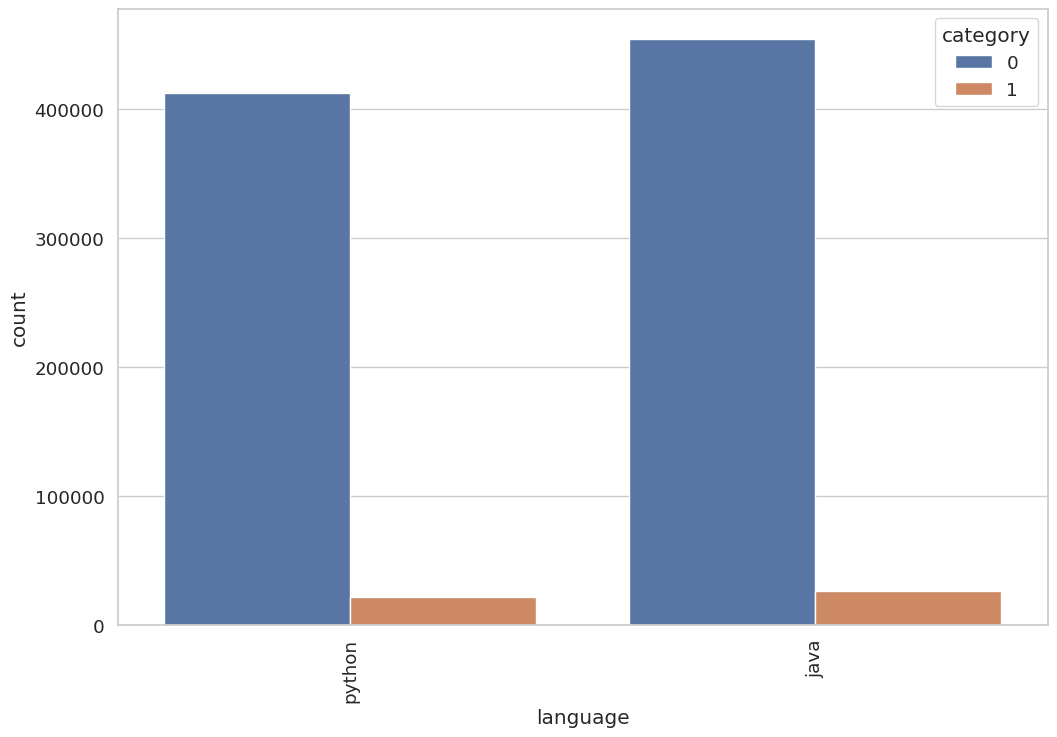

In [13]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x='language', hue='category', data=df)

chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

**SINCE THE TOPICS IN SUBJECT COLUMN ARE DIFFERENT FOR BOTH CATEGORIES, HENCE WE HAVE TO EXCLUDE IT FROM FINAL TEXT COLU**

In [14]:
df['func_name'] = df['func_name'] + " " + df['repo']
del df['repo']
del df['language']
del df['path']

# WHAT ARE STOPWORDS?
Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus. We first download it to our python environment.

In [15]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

# DATA CLEANING

In [16]:
def strip_html(docstring):
    soup = BeautifulSoup(docstring, "html.parser")
    return soup.get_docstring()


In [17]:
#Removing the square brackets
def remove_between_square_brackets(original_string):
    return re.sub('\[[^]]*\]', '', original_string)


In [18]:
#Removing the stopwords from text
def remove_stopwords(docstring,docstring_tokens,func_name):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# WORDCLOUD FOR REAL TEXT (LABEL - 1)

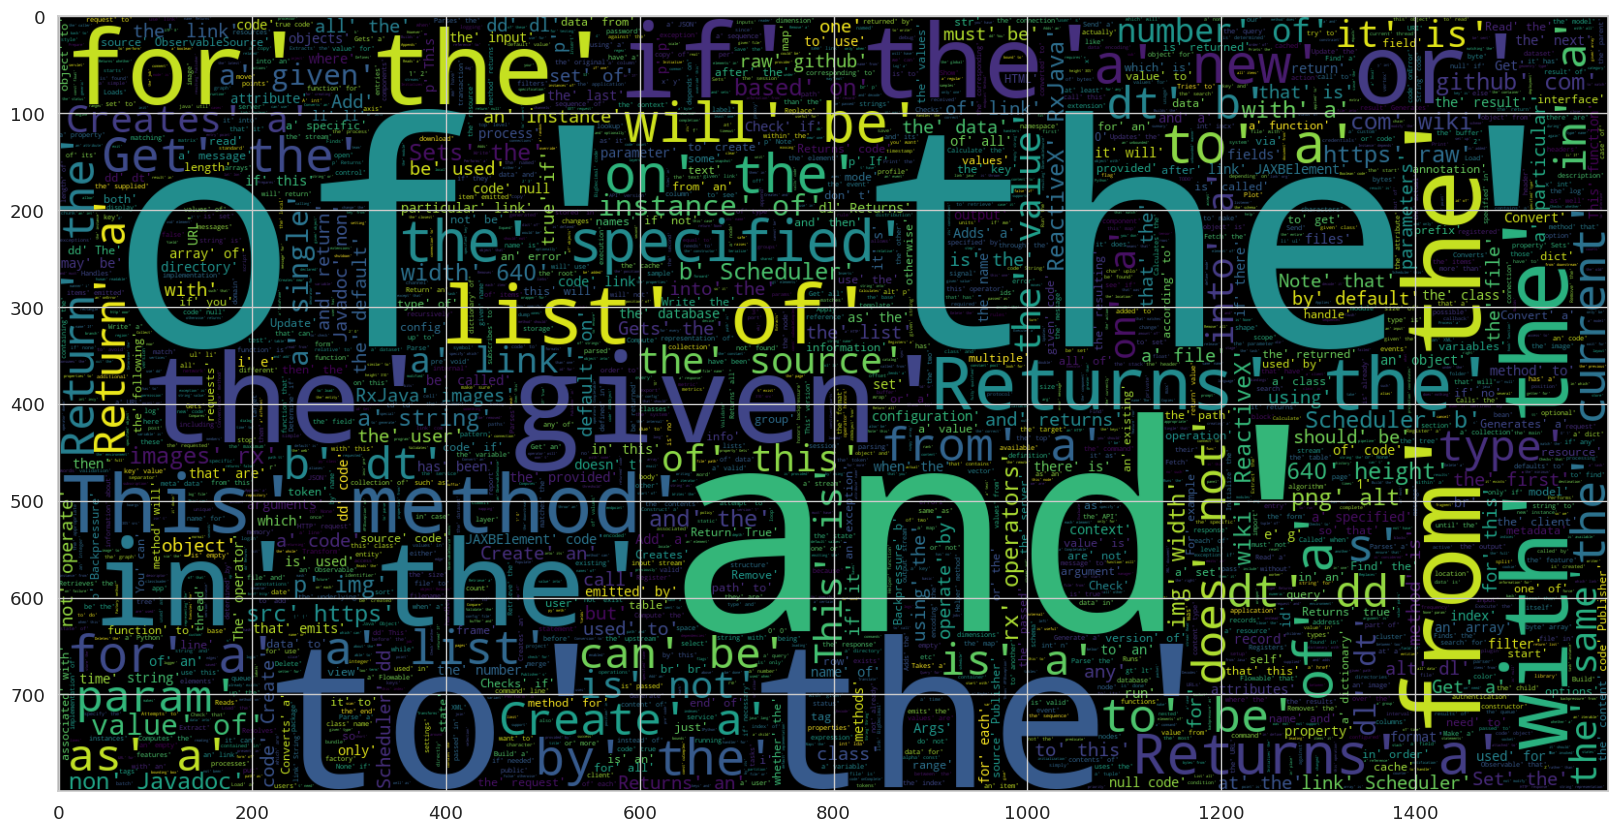

In [19]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].docstring_tokens))
plt.imshow(wc , interpolation = 'bilinear')

# WORDCLOUD FOR FAKE TEXT (LABEL - 0)

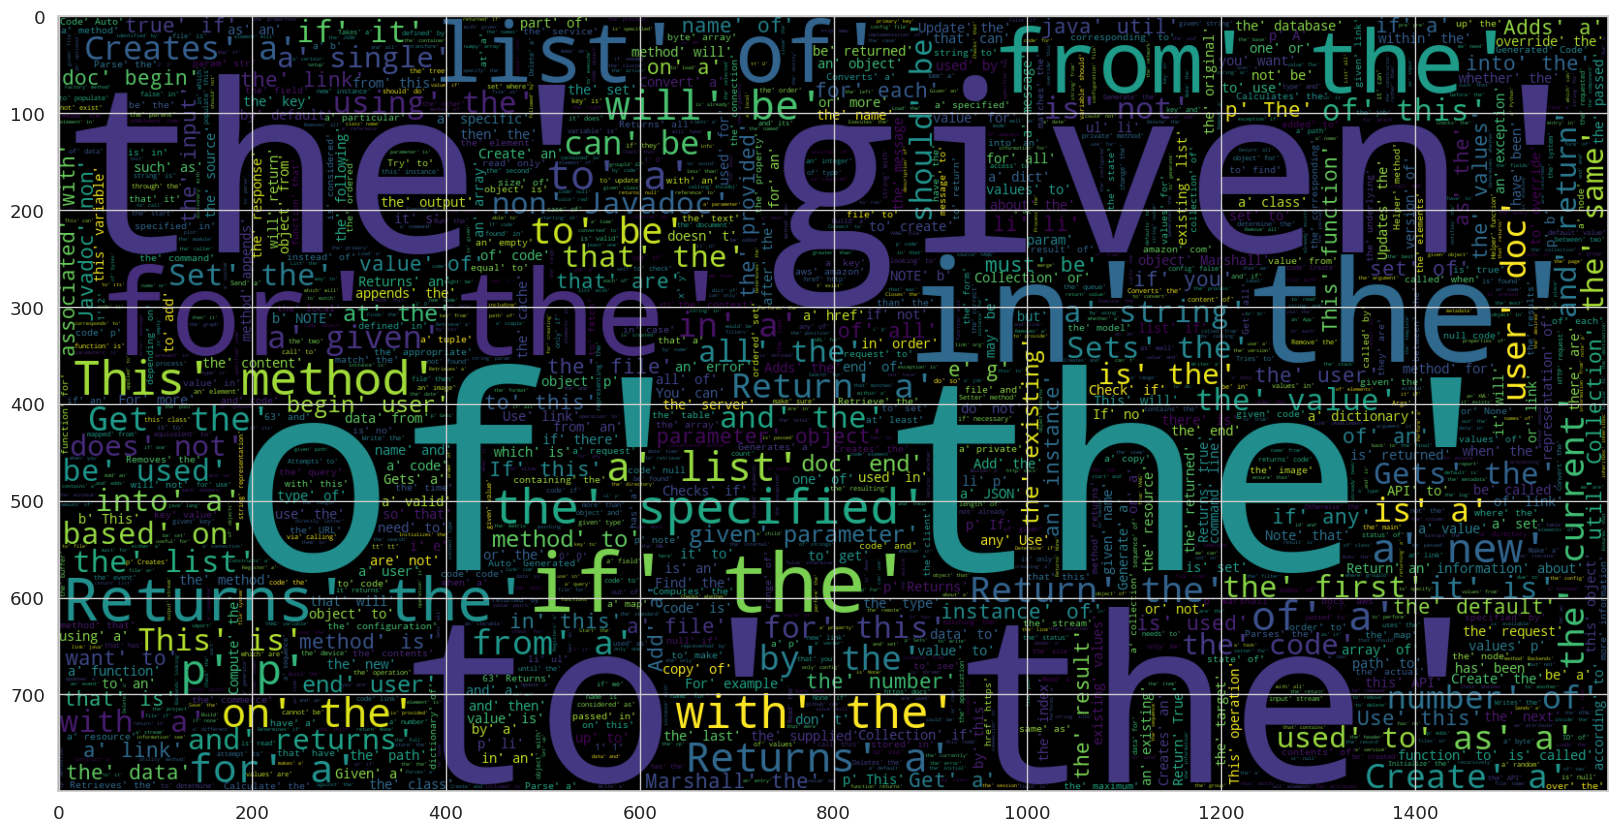

In [20]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].docstring_tokens))
plt.imshow(wc , interpolation = 'bilinear')

**Average word length in a text**

In [21]:
def get_corpus(docstring_tokens):
    words = []
    for i in docstring_tokens:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.docstring_tokens)
corpus[:5]

["['Extracts',", "'video',", "'ID',", "'from',", "'URL',"]

In [22]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{"'the',": 932485,
 "'.']": 539362,
 "'.',": 526158,
 "'a',": 456103,
 "'to',": 320925,
 "'of',": 297271,
 "'>',": 272508,
 "':',": 254942,
 "'/',": 215218,
 "'and',": 186497}

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Unigram Analysis

<Axes: >

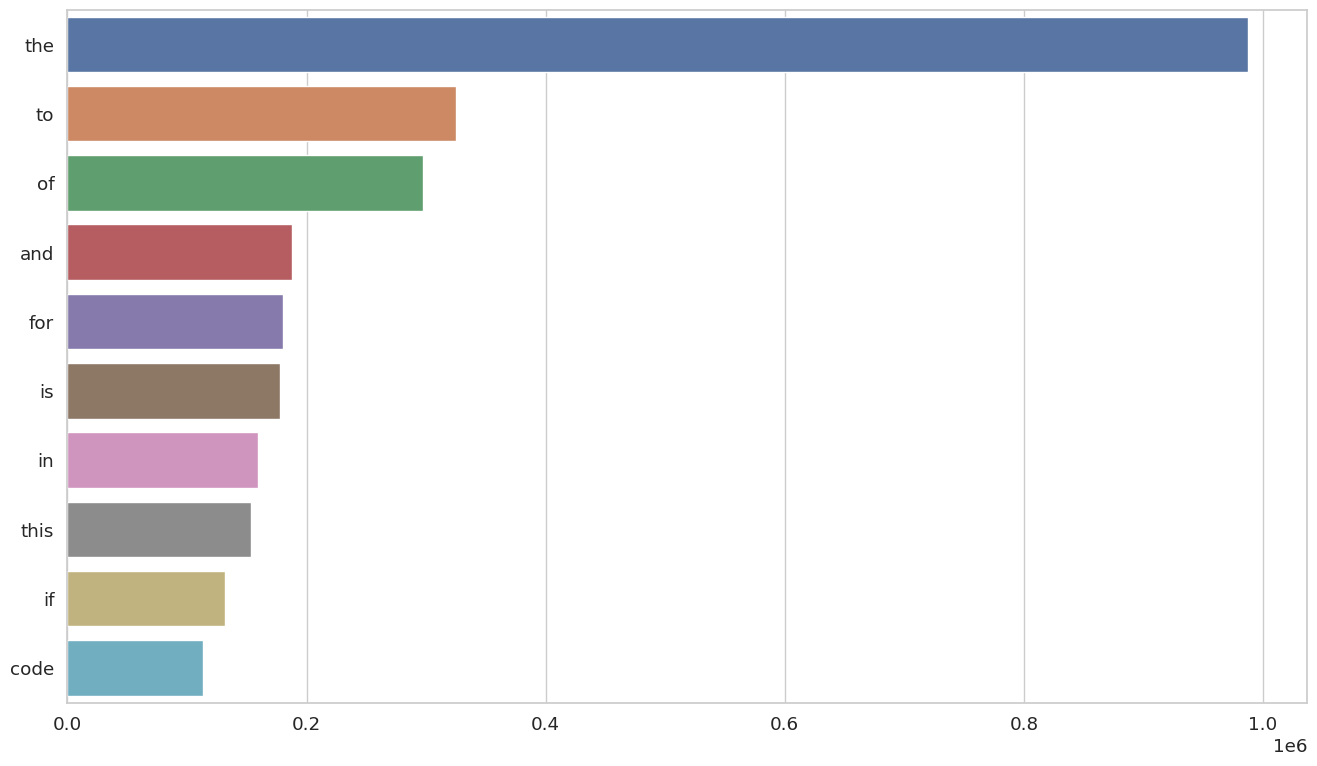

In [24]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.docstring_tokens,10,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

# Bigram Analysis

<Axes: >

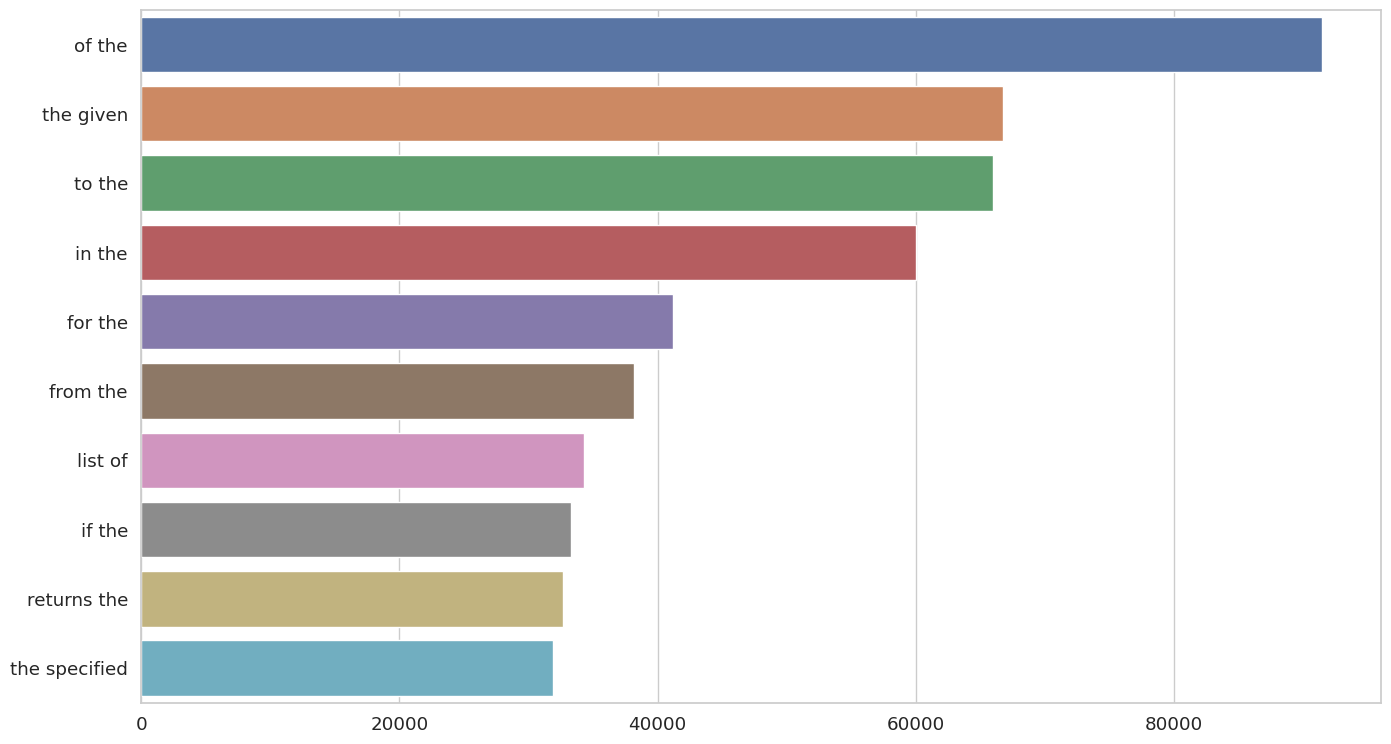

In [25]:
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df.docstring_tokens,10,2)
most_common_bi = dict(most_common_bi)
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

# Trigram Analysis

<Axes: >

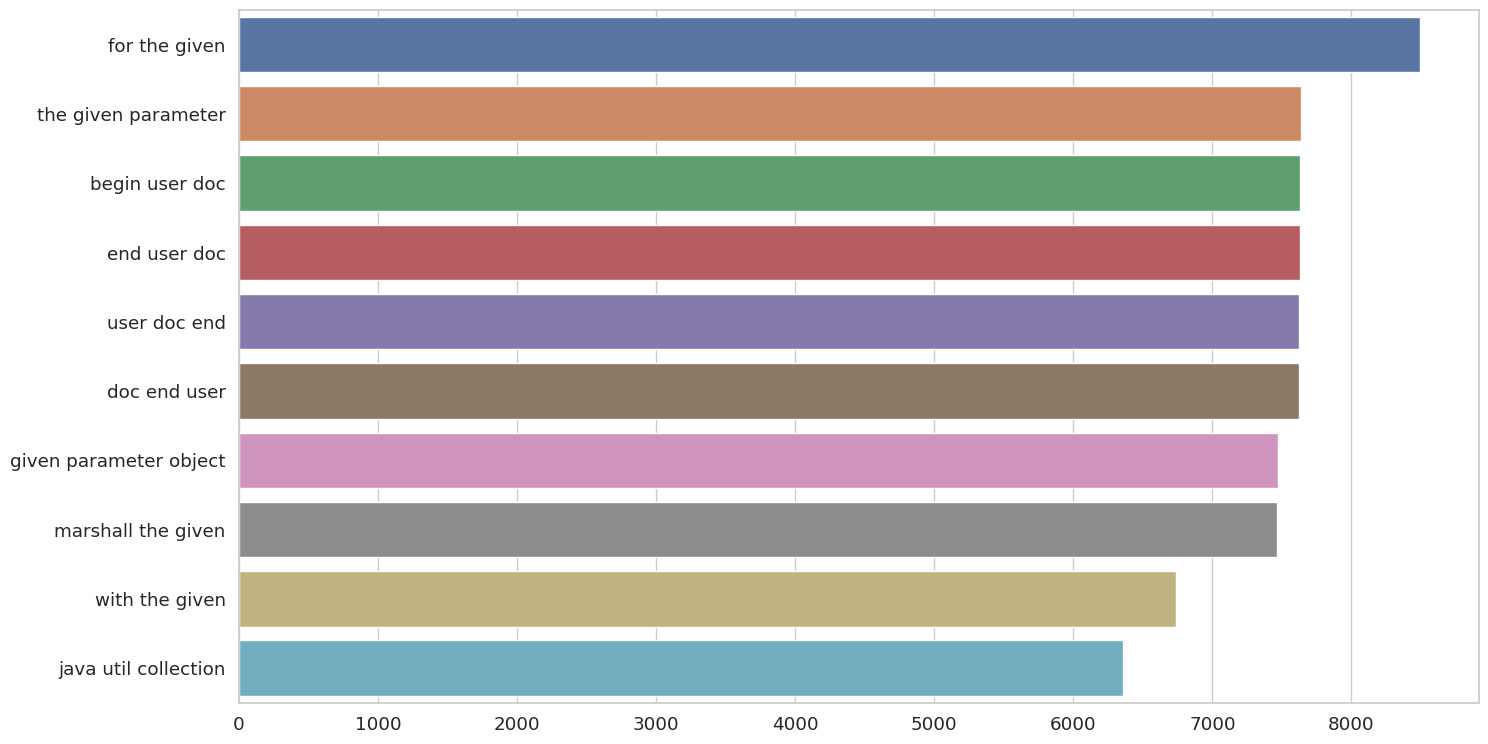

In [26]:
plt.figure(figsize = (16,9))
most_common_tri = get_top_text_ngrams(df.docstring_tokens,10,3)
most_common_tri = dict(most_common_tri)
sns.barplot(x=list(most_common_tri.values()),y=list(most_common_tri.keys()))

# Data

In [27]:
x_train,x_test,y_train,y_test = train_test_split(df.docstring_tokens,df.category,random_state = 0)

In [28]:
max_features = 10000
maxlen = 300

In [29]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
from tensorflow.keras.preprocessing import sequence

# ...



tokenized_train = tokenizer.texts_to_sequences(x_train)
# x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [30]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

# Introduction to GloVe

In [31]:
EMBEDDING_FILE = '/kaggle/input/codetextexp/glove.6B.100d.txt'

In [32]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [33]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


# Some Model Parameters

In [34]:
batch_size = 256
epochs = 5
embed_size = 100

In [35]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

# TRAINING THE MODEL

In [36]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/5
2683/2683 [==============================] - 6612s 2s/step - loss: 0.2095 - accuracy: 0.9464 - val_loss: 0.2114 - val_accuracy: 0.9457 - lr: 0.0100
Epoch 2/5
2683/2683 [==============================] - 6564s 2s/step - loss: 0.2089 - accuracy: 0.9466 - val_loss: 0.2116 - val_accuracy: 0.9457 - lr: 0.0100
Epoch 3/5
2683/2683 [==============================] - ETA: 0s - loss: 0.2088 - accuracy: 0.9466
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
2683/2683 [==============================] - 6582s 2s/step - loss: 0.2088 - accuracy: 0.9466 - val_loss: 0.2110 - val_accuracy: 0.9457 - lr: 0.0100
Epoch 4/5
2683/2683 [==============================] - 6581s 2s/step - loss: 0.2085 - accuracy: 0.9466 - val_loss: 0.2108 - val_accuracy: 0.9457 - lr: 0.0050
Epoch 5/5
 617/2683 [=====>........................] - ETA: 1:21:49 - loss: 0.2086 - accuracy: 0.9466

# Save the model to an H5 File

In [ ]:
from transflow.keras.models import save_model
save_model(model, 'model.h5')

# ANALYSIS AFTER TRAINING OF MODEL

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")